# Notebook para analisar dados salvos pelo Debug
---

In [1]:
import sys
sys.path.append('/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/Codes') 

%load_ext autoreload  
%autoreload 2         

import numpy as np
#from depth_from_focus import *  
#from image_alignment import *
from utils import *
import pandas as pd
import ast



In [2]:
def plot_quadratic_and_xy(A, B, C, x_list, y_list):
    """
    Plota a função de segundo grau A*x^2 + B*x + C junto com os valores de x_list e y_list.

    Args:
        A: Coeficiente A da função de segundo grau.
        B: Coeficiente B da função de segundo grau.
        C: Coeficiente C da função de segundo grau.
        x_list: Lista de valores no eixo x.
        y_list: Lista de valores no eixo y.
    """
    x_values = np.linspace(min(x_list), max(x_list), 400)
    y_values = A * x_values**2 + B * x_values + C

    plt.figure(figsize=(10, 6))
    plt.plot(x_list, y_list, marker='o', linestyle='-', color='b', label='Data Points')
    plt.plot(x_values, y_values, linestyle='--', color='r', label='Quadratic Function')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Plot of X vs Y and Quadratic Function')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
def ler_csv_com_listas(caminho_arquivo):
    def converter_para_lista(valor):
        # Verifica se o valor é uma string que representa uma lista e converte
        try:
            return ast.literal_eval(valor) if valor.startswith('[') else valor
        except:
            return valor

    # Lê o arquivo CSV e converte as colunas com listas
    df = pd.read_csv(caminho_arquivo, converters={
        'x_list': converter_para_lista,
        'y_list': converter_para_lista,
        'w_list': converter_para_lista,
        'focus_values': converter_para_lista
    })

    return df




## Teste 1
focus_indicator = fourier

imagem_final = imagem_reconstruida (sem levar ao quadrado)

In [40]:
debug_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_5/output/depth_from_focus_20241029_1914/debug_data/debug.csv'
debug_info_df = ler_csv_com_listas(debug_path)
debug_info_df.head()

,pixel_i,pixel_j,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
0,1,1,"[7, 8, 9, 10, 11]","[0.006108061423638424, 0.054733478894591604, 0...","[1, 4, 6, 4, 1]",9.152358,0.022973,0.089903,-0.022973,0.420520,-1.834472
1,1,2,"[0, 1, 2]","[0.1899850511785332, 0.15576384778599242, 0.03...","[1, 2, 1]",0.119897,0.045016,0.190632,-0.045016,0.010795,0.189985
2,1,3,"[0, 1, 2]","[0.3074269995640989, 0.2881147876384312, 0.044...","[1, 2, 1]",0.413948,0.112212,0.326655,-0.112212,0.092900,0.307427
3,1,4,"[0, 1, 2]","[0.17927654788060293, 0.18170242695429356, 0.1...","[1, 2, 1]",0.530178,0.040192,0.190574,-0.040192,0.042618,0.179277
4,1,5,"[0, 1, 2, 3, 4]","[0.0315591894068891, 0.027383784582622448, 0.1...","[1, 4, 6, 4, 1]",1.942491,0.046876,0.097549,-0.046876,0.182113,-0.079327


In [41]:
debug_info_df.tail()

,pixel_i,pixel_j,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
75679,238,314,"[4, 5, 6, 7, 8]","[0.0410081874505297, 0.037058757785457315, 0.0...","[1, 4, 6, 4, 1]",5.667416,0.015677,0.054192,-0.015677,0.177700,-0.449358
75680,238,315,"[3, 4, 5, 6, 7]","[0.006289201241932378, 0.045758882091516004, 0...","[1, 4, 6, 4, 1]",4.676513,0.016512,0.056214,-0.016512,0.154439,-0.304903
75681,238,316,"[7, 8, 9, 10, 11]","[0.017976157355103318, 0.03177966560087474, 0....","[1, 4, 6, 4, 1]",8.937521,0.021716,0.060749,-0.021716,0.388173,-1.673902
75682,238,317,"[3, 4, 5, 6, 7]","[0.04267629863133716, 0.010976978224446304, 0....","[1, 4, 6, 4, 1]",5.190663,0.023117,0.062113,-0.023117,0.239982,-0.560721
75683,238,318,"[9, 10, 11]","[0.05114546159187666, 0.10426400602569949, 0.0...","[1, 2, 1]",10.142091,0.041364,0.105099,-0.041364,0.839029,-4.149655


OLD - A: -0.0549371811862607, B: 0.6538428014234451, C: -1.847444138556632, min:5.950822260125037, k_fuzzy:5.95082226012503, conf:0.0549371811862607
A: -0.054937181186260765, B: 0.6538428014234451, C: -1.8474441385566318, min:5.95082226012503


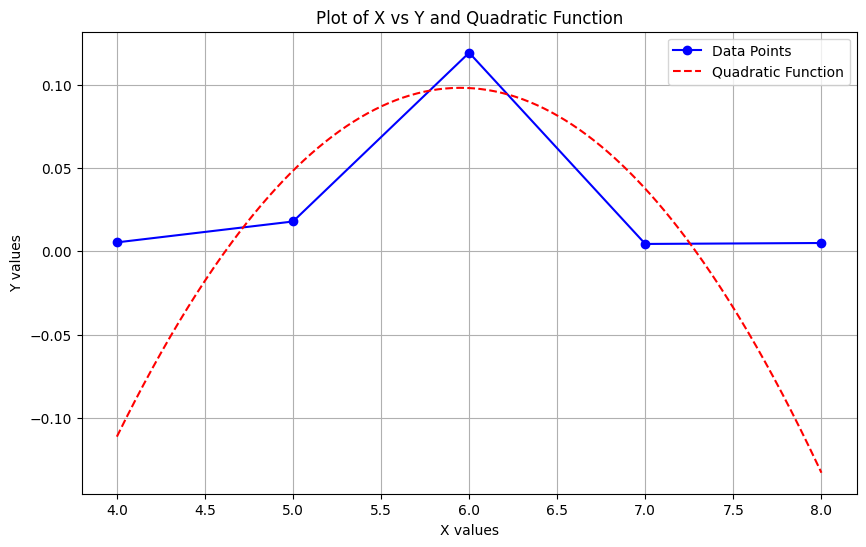

In [65]:

i = 120
j = 172

x_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'x_list'].item()
y_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'y_list'].item()
w_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'w_list'].item()
A = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'A'].item()
B = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'B'].item()
C = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'C'].item()
k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
conf = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'conf'].item()

print(f'OLD - A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}, k_fuzzy:{k_fuzzy}, conf:{conf}')


A, B, C = tuple(np.polyfit(x_list, y_list, 2, w=w_list)) #coeficientes da funcao de segundo grau
print(f'A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}')
plot_quadratic_and_xy(A, B, C, x_list, y_list)

OLD - A: 0.0417696389905616, B: -0.1375883721360293, C: 0.1282511506342967, min:1.6469901998329362, k_fuzzy:0.0, conf:0.0
A: 0.04176963899056166, B: -0.13758837213602934, C: 0.12825115063429673, min:1.6469901998329344


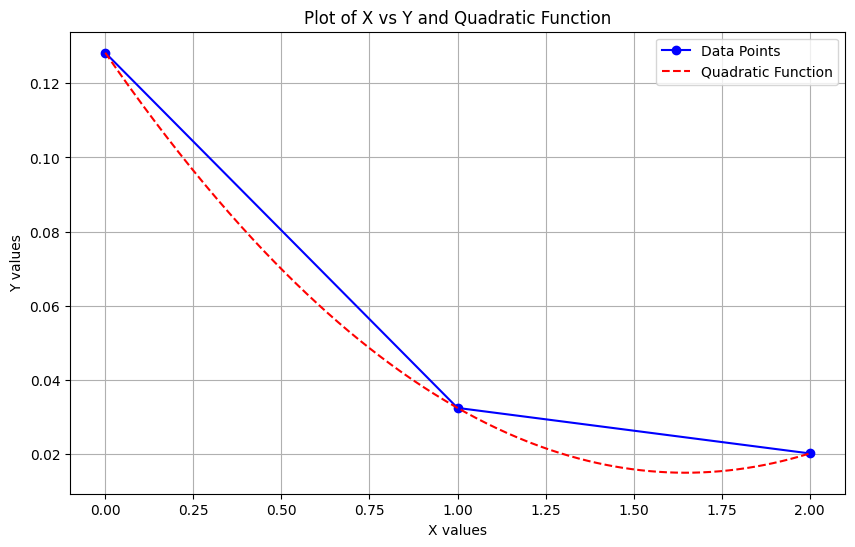

In [ ]:

i = 92
j = 172

x_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'x_list'].item()
y_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'y_list'].item()
w_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'w_list'].item()
A = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'A'].item()
B = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'B'].item()
C = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'C'].item()
k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
conf = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'conf'].item()

print(f'OLD - A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}, k_fuzzy:{k_fuzzy}, conf:{conf}')


A, B, C = tuple(np.polyfit(x_list, y_list, 2, w=w_list)) #coeficientes da funcao de segundo grau
print(f'A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}')
plot_quadratic_and_xy(A, B, C, x_list, y_list)

### Ao utilizar apenas o valor máximo o armax fica sujeito ao resultado do focus_indicator, que quando erra, gera argmax=0

In [55]:
range_j = [j for j in range(160,180)]
i = 40
for j in range_j:
    k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
    print(f'j:{j}, k_fuzzy:{k_fuzzy}')

j:160, k_fuzzy:5.527579289080069
j:161, k_fuzzy:5.438796820871416
j:162, k_fuzzy:8.66603687596343
j:163, k_fuzzy:5.322926925325076
j:164, k_fuzzy:5.664670470023412
j:165, k_fuzzy:5.779921035536139
j:166, k_fuzzy:5.912871898708399
j:167, k_fuzzy:5.936880188202371
j:168, k_fuzzy:5.59299127848282
j:169, k_fuzzy:5.944332427908709
j:170, k_fuzzy:5.947758413338589
j:171, k_fuzzy:5.948254486913937
j:172, k_fuzzy:0.9888438137098424
j:173, k_fuzzy:6.165552941733392
j:174, k_fuzzy:6.449880064127308
j:175, k_fuzzy:6.360986588263327
j:176, k_fuzzy:5.594240188471071
j:177, k_fuzzy:6.319419213365892
j:178, k_fuzzy:6.436648897548071
j:179, k_fuzzy:6.042471690288781


<Axes: title={'center': 'k_fuzzy vs pixel_j'}, xlabel='pixel_j', ylabel='k_fuzzy'>

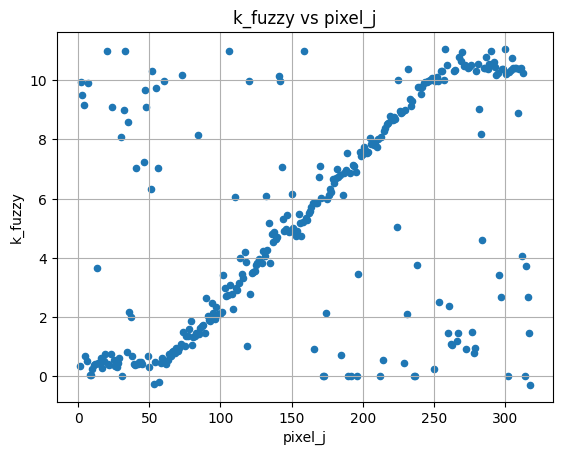

In [58]:
debug_info_df[debug_info_df['pixel_i'] == 92][['k_fuzzy','pixel_j']].plot(x='pixel_j', y='k_fuzzy', kind='scatter', title='k_fuzzy vs pixel_j', grid=True)

Max conf: 0.6932501416262861
Min conf: 0.0
Mean conf: 0.07086377870527366
Std dev conf: 0.06129843206270193


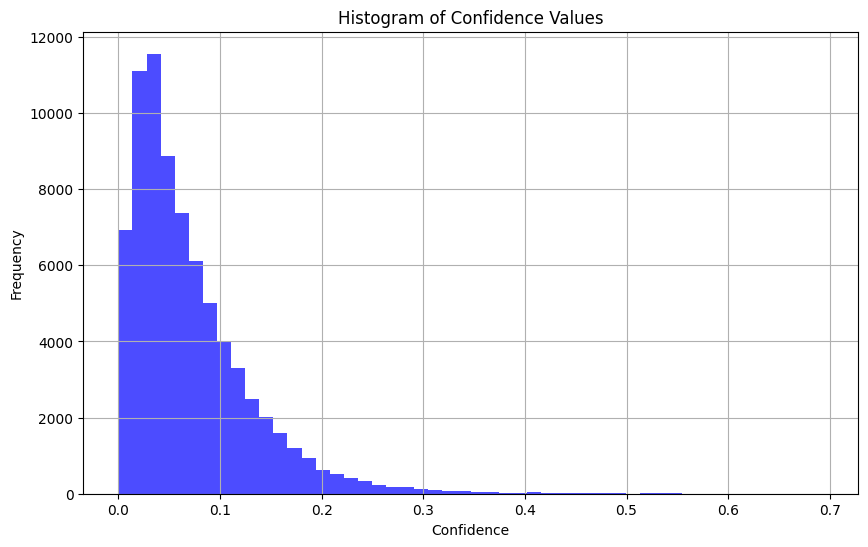

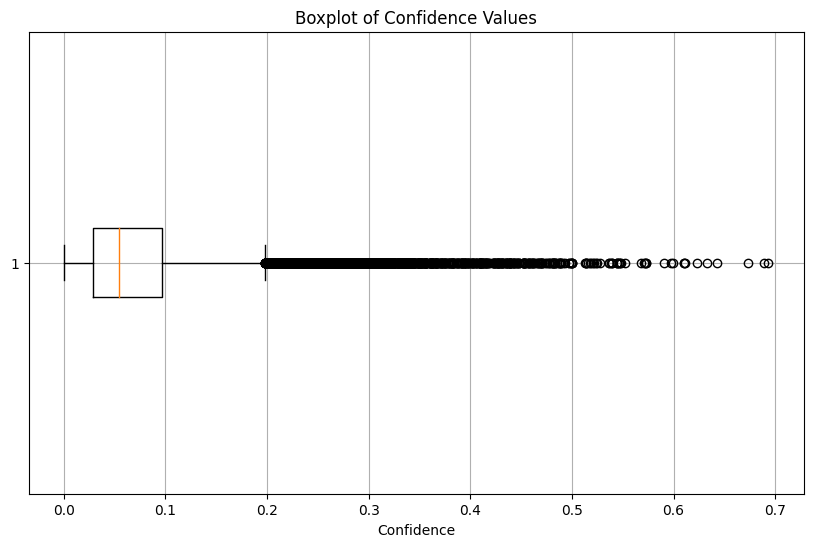

In [57]:
debug_info_df['conf'].max()

conf_max = debug_info_df['conf'].max()
conf_min = debug_info_df['conf'].min()
conf_mean = debug_info_df['conf'].mean()
conf_std = debug_info_df['conf'].std()

print(f'Max conf: {conf_max}')
print(f'Min conf: {conf_min}')
print(f'Mean conf: {conf_mean}')
print(f'Std dev conf: {conf_std}')
import matplotlib.pyplot as plt

# Plot histogram of 'conf' values
plt.figure(figsize=(10, 6))
plt.hist(debug_info_df['conf'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Confidence Values')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot boxplot of 'conf' values
plt.figure(figsize=(10, 6))
plt.boxplot(debug_info_df['conf'], vert=False)
plt.title('Boxplot of Confidence Values')
plt.xlabel('Confidence')
plt.grid(True)
plt.show()

# Teste 2
focus_indicator = fourier

imagem_final = imagem_reconstruida **2

In [4]:
debug_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_5/output/depth_from_focus_20241029_1944/debug_data/debug.csv'
debug_info_df = ler_csv_com_listas(debug_path)
debug_info_df.head()

,pixel_i,pixel_j,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
0,1,1,"[0, 1, 2]","[0.02453481437244839, 0.015321336395807655, 0....","[1, 2, 1]",-0.500000,0.000056,0.401791,-0.000056,-0.009158,0.024535
1,1,2,"[0, 1, 2]","[0.061502397167570146, 0.04184190763257723, 0....","[1, 2, 1]",-0.500000,0.006917,0.067371,-0.006917,-0.012743,0.061502
2,1,3,"[0, 1, 2]","[0.08200286569962076, 0.06277036653292636, 0.0...","[1, 2, 1]",-0.019437,0.018513,0.082010,-0.018513,-0.000720,0.082003
3,1,4,"[0, 1, 2]","[0.05854004899484121, 0.05906856532965616, 0.0...","[1, 2, 1]",0.511131,0.023741,0.064743,-0.023741,0.024270,0.058540
4,1,5,"[0, 1, 2]","[0.0630252257337911, 0.04984206114851753, 0.01...","[1, 2, 1]",-0.234335,0.008976,0.063518,-0.008976,-0.004207,0.063025


In [5]:
debug_info_df.tail()

,pixel_i,pixel_j,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
75679,238,314,"[9, 10, 11]","[0.010303006522186174, 0.03528516525558892, 0....","[1, 2, 1]",10.011476,0.024422,0.035288,-0.024422,0.488993,-2.412484
75680,238,315,"[9, 10, 11]","[0.0118305724942937, 0.023244658758727547, 0.0...","[1, 2, 1]",9.967354,0.012211,0.023258,-0.012211,0.243431,-1.189923
75681,238,316,"[7, 8, 9, 10, 11]","[0.005167021188398788, 0.008336609943813422, 0...","[1, 4, 6, 4, 1]",9.474849,0.002710,0.015321,-0.002710,0.051354,-0.227965
75682,238,317,"[0, 1, 2]","[0.012498677444020044, 0.005985660036956041, 0...","[1, 2, 1]",0.000000,0.000000,0.000000,0.002150,-0.008663,0.012499
75683,238,318,"[9, 10, 11]","[0.004468218831840824, 0.02225567114135437, 0....","[1, 2, 1]",10.310510,0.010973,0.023314,-0.010973,0.226274,-1.143188


OLD - A: -0.0237234553057404, B: 0.2834826166314387, C: -0.79667239569556, min:5.9747328746593675, k_fuzzy:5.974732874659365, conf:0.0237234553057404
A: -0.023723455305740413, B: 0.28348261663143876, C: -0.79667239569556, min:5.974732874659365


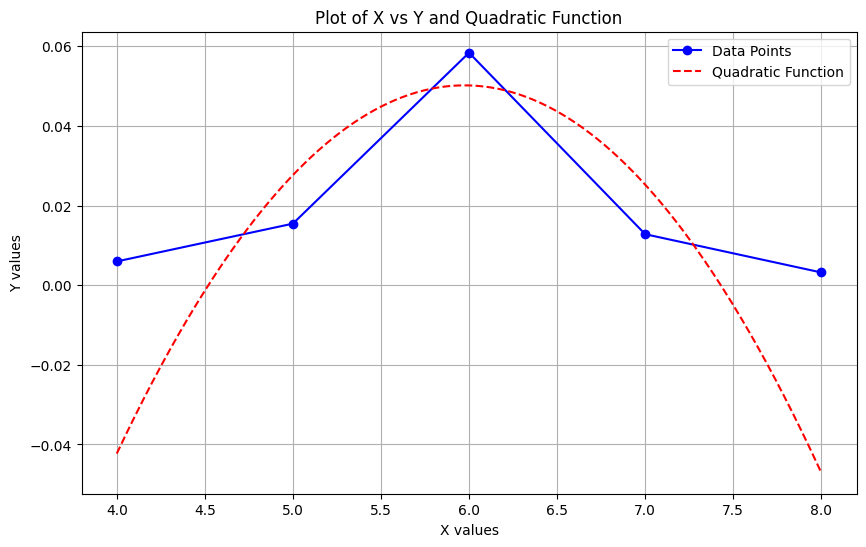

In [6]:

i = 92
j = 172

x_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'x_list'].item()
y_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'y_list'].item()
w_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'w_list'].item()
A = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'A'].item()
B = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'B'].item()
C = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'C'].item()
k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
conf = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'conf'].item()

print(f'OLD - A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}, k_fuzzy:{k_fuzzy}, conf:{conf}')


A, B, C = tuple(np.polyfit(x_list, y_list, 2, w=w_list)) #coeficientes da funcao de segundo grau
print(f'A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}')
plot_quadratic_and_xy(A, B, C, x_list, y_list)

In [62]:
range_j = [j for j in range(160,180)]
i = 40
for j in range_j:
    k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
    print(f'j:{j}, k_fuzzy:{k_fuzzy}')

j:160, k_fuzzy:5.462553336242174
j:161, k_fuzzy:5.43318078662098
j:162, k_fuzzy:5.862201448288734
j:163, k_fuzzy:5.926126706216729
j:164, k_fuzzy:5.834206577662004
j:165, k_fuzzy:5.872944990203402
j:166, k_fuzzy:5.923099591293177
j:167, k_fuzzy:5.994105458507394
j:168, k_fuzzy:5.961692330500122
j:169, k_fuzzy:5.958130774713713
j:170, k_fuzzy:5.965975977612592
j:171, k_fuzzy:5.9674037517422684
j:172, k_fuzzy:5.960788632082884
j:173, k_fuzzy:6.036075413671706
j:174, k_fuzzy:6.117322617534293
j:175, k_fuzzy:6.036726148856193
j:176, k_fuzzy:5.901035889288613
j:177, k_fuzzy:6.15930283228714
j:178, k_fuzzy:6.443106052815729
j:179, k_fuzzy:6.525902732003371


<Axes: title={'center': 'k_fuzzy vs pixel_j'}, xlabel='pixel_j', ylabel='k_fuzzy'>

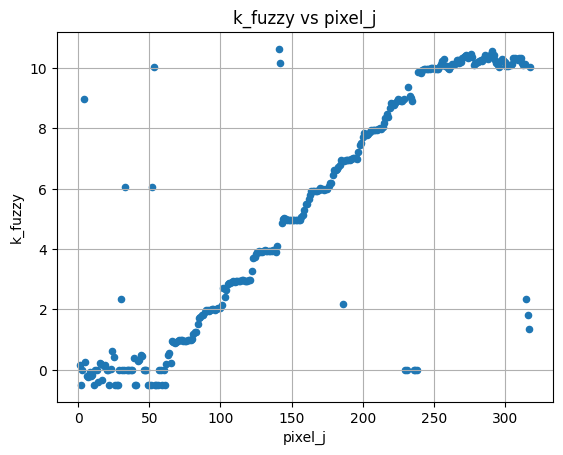

In [63]:
debug_info_df[debug_info_df['pixel_i'] == 92][['k_fuzzy','pixel_j']].plot(x='pixel_j', y='k_fuzzy', kind='scatter', title='k_fuzzy vs pixel_j', grid=True)

### Ao elevar o focus_indicator ao quadrado a rampa fica mais parecida com uma escada

Max conf: 0.6676878538947588
Min conf: 0.0
Mean conf: 0.03816319114125804
Std dev conf: 0.042541735404450755


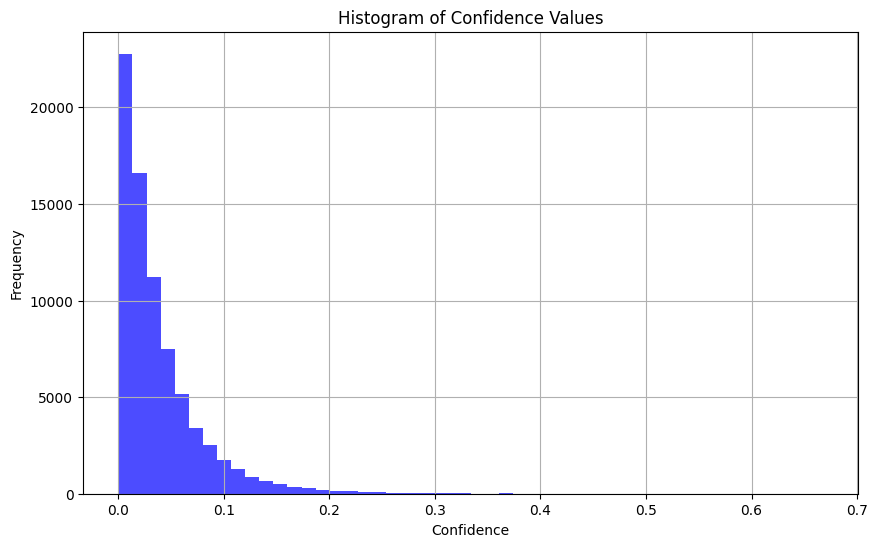

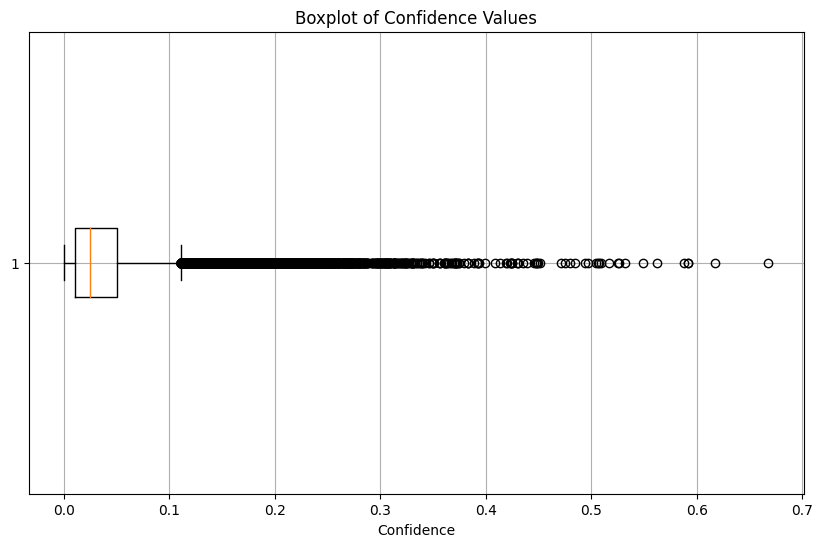

In [64]:
debug_info_df['conf'].max()

conf_max = debug_info_df['conf'].max()
conf_min = debug_info_df['conf'].min()
conf_mean = debug_info_df['conf'].mean()
conf_std = debug_info_df['conf'].std()

print(f'Max conf: {conf_max}')
print(f'Min conf: {conf_min}')
print(f'Mean conf: {conf_mean}')
print(f'Std dev conf: {conf_std}')
import matplotlib.pyplot as plt

# Plot histogram of 'conf' values
plt.figure(figsize=(10, 6))
plt.hist(debug_info_df['conf'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Confidence Values')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot boxplot of 'conf' values
plt.figure(figsize=(10, 6))
plt.boxplot(debug_info_df['conf'], vert=False)
plt.title('Boxplot of Confidence Values')
plt.xlabel('Confidence')
plt.grid(True)
plt.show()

### A Confiança fica concentrada mais próxima do valor de zero

# Teste 3
focus_indicator = fourier

imagem_final = imagem_reconstruida **2

In [35]:
debug_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_5/output/depth_from_focus_20241030_1757/debug_data/debug.csv'
debug_info_df = ler_csv_com_listas(debug_path)
debug_info_df.head()

,pixel_i,pixel_j,focus_values,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
0,1,1,"[0.02453481437244839, 0.015321336395807655, 0....","[0, 1, 2]","[0.02453481437244839, 0.015321336395807655, 0....","[1, 2, 1]",-0.500000,0.000056,0.401791,-0.000056,-0.009158,0.024535
1,1,2,"[0.061502397167570146, 0.04184190763257723, 0....","[0, 1, 2]","[0.061502397167570146, 0.04184190763257723, 0....","[1, 2, 1]",-0.500000,0.006917,0.067371,-0.006917,-0.012743,0.061502
2,1,3,"[0.08200286569962076, 0.06277036653292636, 0.0...","[0, 1, 2]","[0.08200286569962076, 0.06277036653292636, 0.0...","[1, 2, 1]",-0.019437,0.018513,0.082010,-0.018513,-0.000720,0.082003
3,1,4,"[0.05854004899484121, 0.05906856532965616, 0.0...","[0, 1, 2]","[0.05854004899484121, 0.05906856532965616, 0.0...","[1, 2, 1]",0.511131,0.023741,0.064743,-0.023741,0.024270,0.058540
4,1,5,"[0.0630252257337911, 0.04984206114851753, 0.01...","[0, 1, 2]","[0.0630252257337911, 0.04984206114851753, 0.01...","[1, 2, 1]",-0.234335,0.008976,0.063518,-0.008976,-0.004207,0.063025


In [36]:
debug_info_df.tail()

,pixel_i,pixel_j,focus_values,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
75679,238,314,"[0.016604974881291416, 0.004819582951889948, 0...","[9, 10, 11]","[0.010303006522186174, 0.03528516525558892, 0....","[1, 2, 1]",10.011476,0.024422,0.035288,-0.024422,0.488993,-2.412484
75680,238,315,"[0.012733550368083909, 0.004946795050341828, 0...","[9, 10, 11]","[0.0118305724942937, 0.023244658758727547, 0.0...","[1, 2, 1]",9.967354,0.012211,0.023258,-0.012211,0.243431,-1.189923
75681,238,316,"[0.012697715079268628, 0.005027119023974822, 0...","[7, 8, 9, 10, 11]","[0.005167021188398788, 0.008336609943813422, 0...","[1, 4, 6, 4, 1]",9.474849,0.002710,0.015321,-0.002710,0.051354,-0.227965
75682,238,317,"[0.012498677444020044, 0.005985660036956041, 0...","[0, 1, 2]","[0.012498677444020044, 0.005985660036956041, 0...","[1, 2, 1]",0.000000,0.000000,0.000000,0.002150,-0.008663,0.012499
75683,238,318,"[0.007495610040143026, 0.006428548921437557, 0...","[9, 10, 11]","[0.004468218831840824, 0.02225567114135437, 0....","[1, 2, 1]",10.310510,0.010973,0.023314,-0.010973,0.226274,-1.143188


OLD - A: -0.0237234553057404, B: 0.2834826166314387, C: -0.79667239569556, min:5.9747328746593675, k_fuzzy:5.974732874659365, conf:0.0237234553057404
A: -0.023723455305740413, B: 0.28348261663143876, C: -0.79667239569556, min:5.974732874659365


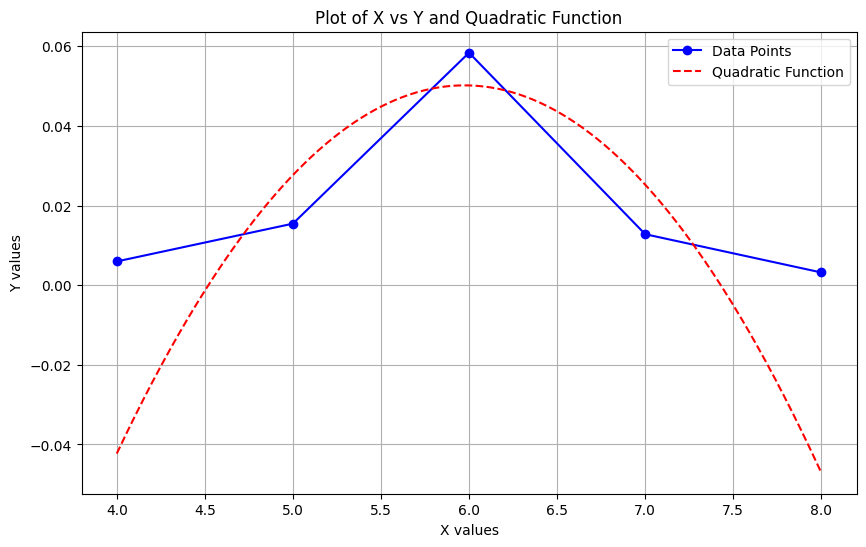

In [37]:

i = 92
j = 172

x_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'x_list'].item()
y_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'y_list'].item()
w_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'w_list'].item()
A = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'A'].item()
B = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'B'].item()
C = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'C'].item()
k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
conf = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'conf'].item()
focus_values = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'focus_values'].item()

print(f'OLD - A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}, k_fuzzy:{k_fuzzy}, conf:{conf}')


A, B, C = tuple(np.polyfit(x_list, y_list, 2, w=w_list)) #coeficientes da funcao de segundo grau
print(f'A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}')
plot_quadratic_and_xy(A, B, C, x_list, y_list)

In [38]:
focus_values

[0.026279633555204192,
 0.012147702819172455,
 0.0090668323552432,
 0.009164666547578342,
 0.005961995195862894,
 0.015457798076239095,
 0.05839438719934446,
 0.012806695146335381,
 0.0031938778861702686,
 0.005595200973723487,
 0.007756229077129971,
 0.0045053557868747745]

In [ ]:
range_j = [j for j in range(160,180)]
i = 40
for j in range_j:
    k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
    print(f'j:{j}, k_fuzzy:{k_fuzzy}')

j:160, k_fuzzy:5.462553336242174
j:161, k_fuzzy:5.43318078662098
j:162, k_fuzzy:5.862201448288734
j:163, k_fuzzy:5.926126706216729
j:164, k_fuzzy:5.834206577662004
j:165, k_fuzzy:5.872944990203402
j:166, k_fuzzy:5.923099591293177
j:167, k_fuzzy:5.994105458507394
j:168, k_fuzzy:5.961692330500122
j:169, k_fuzzy:5.958130774713713
j:170, k_fuzzy:5.965975977612592
j:171, k_fuzzy:5.9674037517422684
j:172, k_fuzzy:5.960788632082884
j:173, k_fuzzy:6.036075413671706
j:174, k_fuzzy:6.117322617534293
j:175, k_fuzzy:6.036726148856193
j:176, k_fuzzy:5.901035889288613
j:177, k_fuzzy:6.15930283228714
j:178, k_fuzzy:6.443106052815729
j:179, k_fuzzy:6.525902732003371


<Axes: title={'center': 'k_fuzzy vs pixel_j'}, xlabel='pixel_j', ylabel='k_fuzzy'>

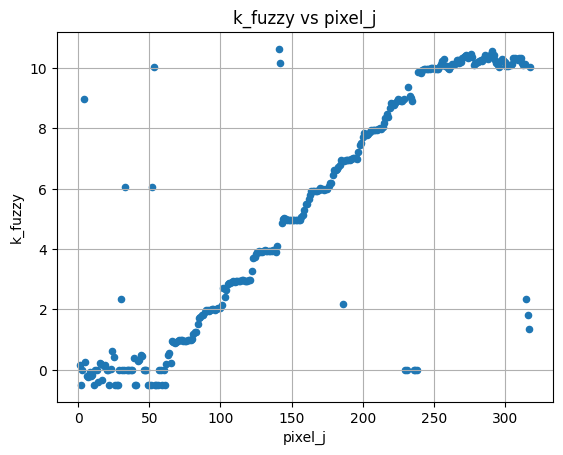

In [ ]:
debug_info_df[debug_info_df['pixel_i'] == 92][['k_fuzzy','pixel_j']].plot(x='pixel_j', y='k_fuzzy', kind='scatter', title='k_fuzzy vs pixel_j', grid=True)

### Ao elevar o focus_indicator ao quadrado a rampa fica mais parecida com uma escada

Max conf: 0.6676878538947588
Min conf: 0.0
Mean conf: 0.03816319114125804
Std dev conf: 0.042541735404450755


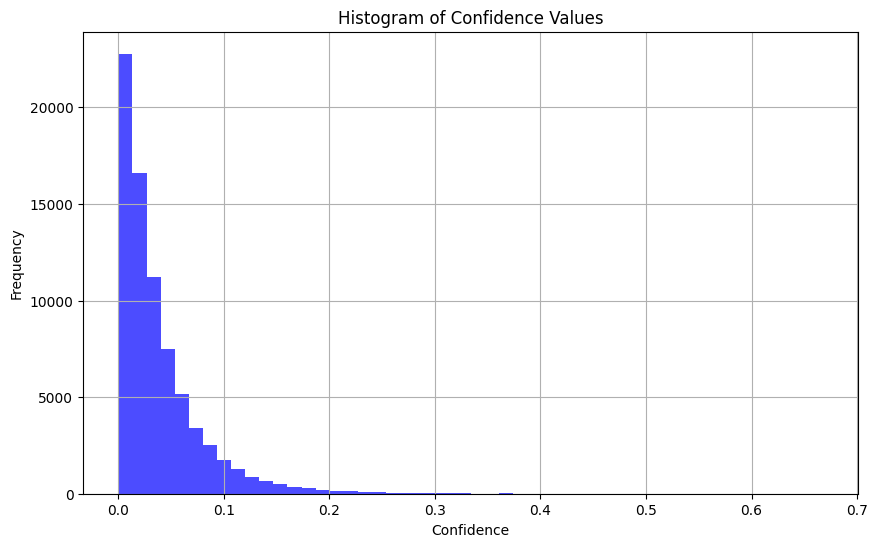

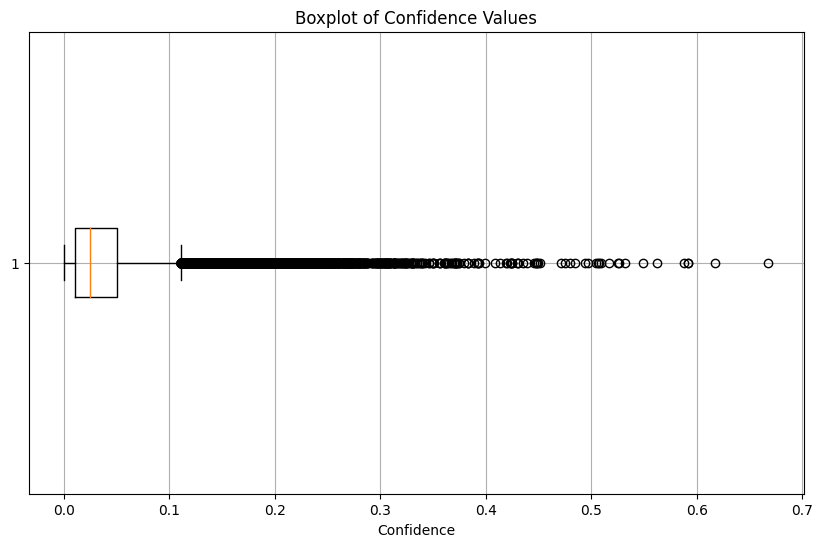

In [ ]:
debug_info_df['conf'].max()

conf_max = debug_info_df['conf'].max()
conf_min = debug_info_df['conf'].min()
conf_mean = debug_info_df['conf'].mean()
conf_std = debug_info_df['conf'].std()

print(f'Max conf: {conf_max}')
print(f'Min conf: {conf_min}')
print(f'Mean conf: {conf_mean}')
print(f'Std dev conf: {conf_std}')
import matplotlib.pyplot as plt

# Plot histogram of 'conf' values
plt.figure(figsize=(10, 6))
plt.hist(debug_info_df['conf'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Confidence Values')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot boxplot of 'conf' values
plt.figure(figsize=(10, 6))
plt.boxplot(debug_info_df['conf'], vert=False)
plt.title('Boxplot of Confidence Values')
plt.xlabel('Confidence')
plt.grid(True)
plt.show()

### A Confiança fica concentrada mais próxima do valor de zero

In [ ]:
def plot_multiple_quadratics(debug_info_df, indices):
    """
    Plota várias funções de segundo grau e seus respectivos pontos de dados a partir de um DataFrame.

    Args:
        debug_info_df: DataFrame contendo os dados.
        indices: Lista de índices das linhas do DataFrame a serem plotadas.
    """
    plt.figure(figsize=(10, 6))

    for idx in indices:
        row = debug_info_df.iloc[idx]
        A = row['A']
        B = row['B']
        C = row['C']
        x_list = row['x_list']
        y_list = row['y_list']

        x_values = np.linspace(min(x_list), max(x_list), 400)
        y_values = A * x_values**2 + B * x_values + C

        plt.plot(x_list, y_list, marker='o', linestyle='-', label=f'Data Points {idx}')
        plt.plot(x_values, y_values, linestyle='--', label=f'Quadratic Function {idx}')

    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Plot of Multiple Quadratic Functions and Data Points')
    plt.legend()
    plt.grid(True)
    plt.show()

In [50]:
def plot_multiple_quadratics_2(debug_info_df, indices):
    """
    Plota várias funções de segundo grau e seus respectivos pontos de dados a partir de um DataFrame.

    Args:
        debug_info_df: DataFrame contendo os dados.
        indices: Lista de índices das linhas do DataFrame a serem plotadas.
    """
    plt.figure(figsize=(10, 6))

    for idx in indices:
        row = debug_info_df.iloc[idx]
        #A = row['A']
        #B = row['B']
        #C = row['C']
        x_list = [i for i in range(len(row['focus_values']))]
        print(x_list)
        y_list = row['focus_values']
        print(y_list)

        x_values = np.linspace(min(x_list), max(x_list), 400)
        #y_values = A * x_values**2 + B * x_values + C

        plt.plot(x_list, y_list, marker='o', linestyle='-', label=f'Data Points {idx}')
        #plt.plot(x_values, y_values, linestyle='--', label=f'Quadratic Function {idx}')

    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Plot of Multiple Quadratic Functions and Data Points')
    #plt.legend()
    plt.grid(True)
    plt.show()

In [41]:
lista_indices = []
i = 100
for j in range(2, 320, 20):
    lista_indices.append(debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j)].index.item())

lista_indices

[31483,
 31503,
 31523,
 31543,
 31563,
 31583,
 31603,
 31623,
 31643,
 31663,
 31683,
 31703,
 31723,
 31743,
 31763,
 31783]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0221449146316797, 0.022688994087947795, 0.004128514823012658, 0.005077821579315158, 0.0067641596085953526, 0.018910834905167723, 0.005175262999540589, 0.006520105693428134, 0.007720373559577349, 0.0044509992730392516, 0.014878067404335121, 0.0054433151298266405]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.049126809391528435, 0.03681697192191752, 0.009574096892096371, 0.010688985639086287, 0.020540469267454148, 0.007038862391201622, 0.01471012530812558, 0.016464395344684912, 0.005760113965422321, 0.009312677841372458, 0.022757813403902687, 0.005847879816564807]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.005941827820759515, 0.0032862997981654867, 0.00603402745504831, 0.009065272827353537, 0.010925254699119797, 0.004864301341734496, 0.010790171683718975, 0.007796033720690498, 0.009845189054343844, 0.0035202378270296937, 0.00603607754032422, 0.002961134713642665]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.11354804335965467, 0.08805472192493527, 0.00556

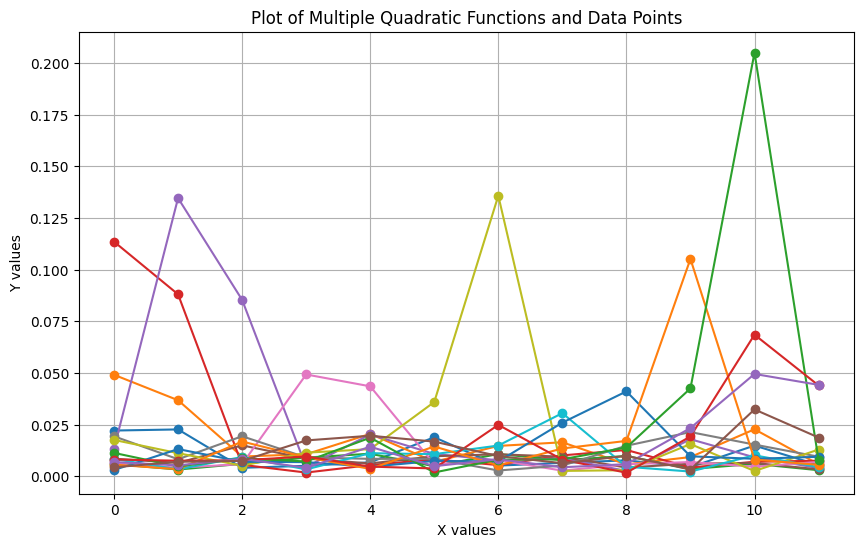

In [51]:
plot_multiple_quadratics_2(debug_info_df,lista_indices)

# Teste 4
focus_indicator = fourier

imagem_final = imagem_reconstruida

In [52]:
debug_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_5/output/depth_from_focus_20241030_1808/debug_data/debug.csv'
debug_info_df = ler_csv_com_listas(debug_path)
debug_info_df.head()

,pixel_i,pixel_j,focus_values,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
0,1,1,"[0.02785648716237357, 0.00847034901884241, 0.0...","[7, 8, 9, 10, 11]","[0.006108061423638424, 0.054733478894591604, 0...","[1, 4, 6, 4, 1]",9.152358,0.022973,0.089903,-0.022973,0.420520,-1.834472
1,1,2,"[0.1899850511785332, 0.15576384778599242, 0.03...","[0, 1, 2]","[0.1899850511785332, 0.15576384778599242, 0.03...","[1, 2, 1]",0.119897,0.045016,0.190632,-0.045016,0.010795,0.189985
2,1,3,"[0.3074269995640989, 0.2881147876384312, 0.044...","[0, 1, 2]","[0.3074269995640989, 0.2881147876384312, 0.044...","[1, 2, 1]",0.413948,0.112212,0.326655,-0.112212,0.092900,0.307427
3,1,4,"[0.17927654788060293, 0.18170242695429356, 0.1...","[0, 1, 2]","[0.17927654788060293, 0.18170242695429356, 0.1...","[1, 2, 1]",0.530178,0.040192,0.190574,-0.040192,0.042618,0.179277
4,1,5,"[0.0315591894068891, 0.027383784582622448, 0.1...","[0, 1, 2, 3, 4]","[0.0315591894068891, 0.027383784582622448, 0.1...","[1, 4, 6, 4, 1]",1.942491,0.046876,0.097549,-0.046876,0.182113,-0.079327


In [53]:
debug_info_df.tail()

,pixel_i,pixel_j,focus_values,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
75679,238,314,"[0.009898225180882621, 0.03493589969947502, 0....","[4, 5, 6, 7, 8]","[0.0410081874505297, 0.037058757785457315, 0.0...","[1, 4, 6, 4, 1]",5.667416,0.015677,0.054192,-0.015677,0.177700,-0.449358
75680,238,315,"[0.052869219795265064, 0.004514017760680733, 0...","[3, 4, 5, 6, 7]","[0.006289201241932378, 0.045758882091516004, 0...","[1, 4, 6, 4, 1]",4.676513,0.016512,0.056214,-0.016512,0.154439,-0.304903
75681,238,316,"[0.052803314976998465, 0.004571114726641993, 0...","[7, 8, 9, 10, 11]","[0.017976157355103318, 0.03177966560087474, 0....","[1, 4, 6, 4, 1]",8.937521,0.021716,0.060749,-0.021716,0.388173,-1.673902
75682,238,317,"[0.021164342012839225, 0.012398132546529156, 0...","[3, 4, 5, 6, 7]","[0.04267629863133716, 0.010976978224446304, 0....","[1, 4, 6, 4, 1]",5.190663,0.023117,0.062113,-0.023117,0.239982,-0.560721
75683,238,318,"[0.005998013594606236, 0.011018327424067885, 0...","[9, 10, 11]","[0.05114546159187666, 0.10426400602569949, 0.0...","[1, 2, 1]",10.142091,0.041364,0.105099,-0.041364,0.839029,-4.149655


OLD - A: 0.0417696389905616, B: -0.1375883721360293, C: 0.1282511506342967, min:1.6469901998329362, k_fuzzy:0.0, conf:0.0
A: 0.04176963899056166, B: -0.13758837213602934, C: 0.12825115063429673, min:1.6469901998329344


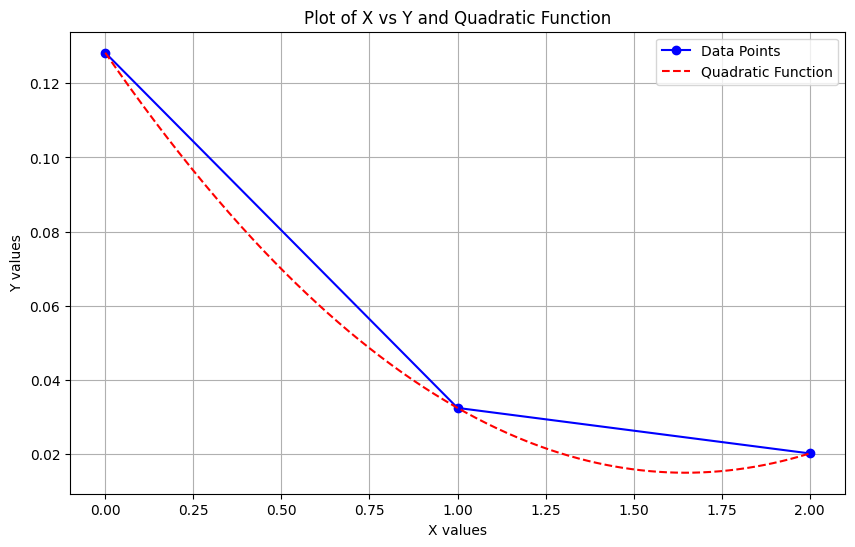

In [54]:

i = 92
j = 172

x_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'x_list'].item()
y_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'y_list'].item()
w_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'w_list'].item()
A = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'A'].item()
B = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'B'].item()
C = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'C'].item()
k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
conf = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'conf'].item()
focus_values = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'focus_values'].item()

print(f'OLD - A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}, k_fuzzy:{k_fuzzy}, conf:{conf}')


A, B, C = tuple(np.polyfit(x_list, y_list, 2, w=w_list)) #coeficientes da funcao de segundo grau
print(f'A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}')
plot_quadratic_and_xy(A, B, C, x_list, y_list)

In [ ]:
range_j = [j for j in range(160,180)]
i = 40
for j in range_j:
    k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
    print(f'j:{j}, k_fuzzy:{k_fuzzy}')

j:160, k_fuzzy:5.462553336242174
j:161, k_fuzzy:5.43318078662098
j:162, k_fuzzy:5.862201448288734
j:163, k_fuzzy:5.926126706216729
j:164, k_fuzzy:5.834206577662004
j:165, k_fuzzy:5.872944990203402
j:166, k_fuzzy:5.923099591293177
j:167, k_fuzzy:5.994105458507394
j:168, k_fuzzy:5.961692330500122
j:169, k_fuzzy:5.958130774713713
j:170, k_fuzzy:5.965975977612592
j:171, k_fuzzy:5.9674037517422684
j:172, k_fuzzy:5.960788632082884
j:173, k_fuzzy:6.036075413671706
j:174, k_fuzzy:6.117322617534293
j:175, k_fuzzy:6.036726148856193
j:176, k_fuzzy:5.901035889288613
j:177, k_fuzzy:6.15930283228714
j:178, k_fuzzy:6.443106052815729
j:179, k_fuzzy:6.525902732003371


<Axes: title={'center': 'k_fuzzy vs pixel_j'}, xlabel='pixel_j', ylabel='k_fuzzy'>

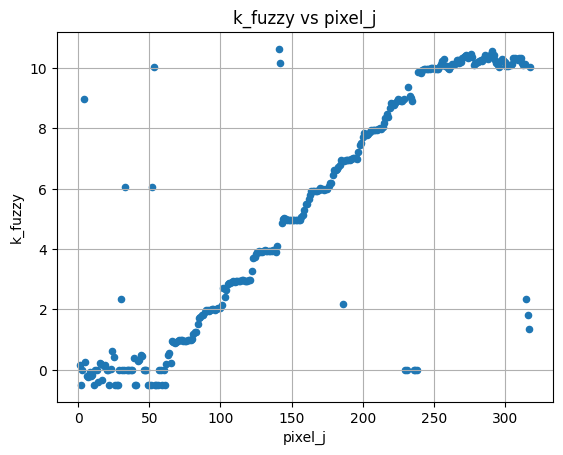

In [ ]:
debug_info_df[debug_info_df['pixel_i'] == 92][['k_fuzzy','pixel_j']].plot(x='pixel_j', y='k_fuzzy', kind='scatter', title='k_fuzzy vs pixel_j', grid=True)

### Ao elevar o focus_indicator ao quadrado a rampa fica mais parecida com uma escada

Max conf: 0.6676878538947588
Min conf: 0.0
Mean conf: 0.03816319114125804
Std dev conf: 0.042541735404450755


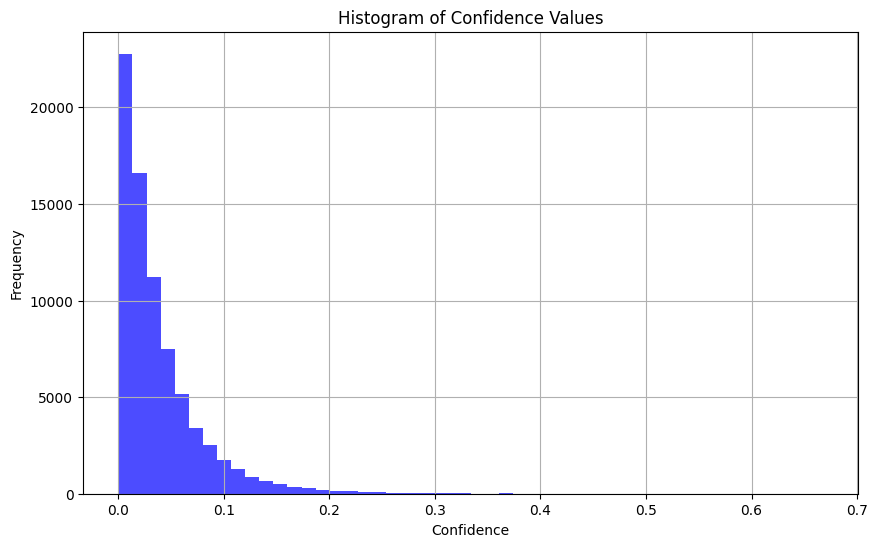

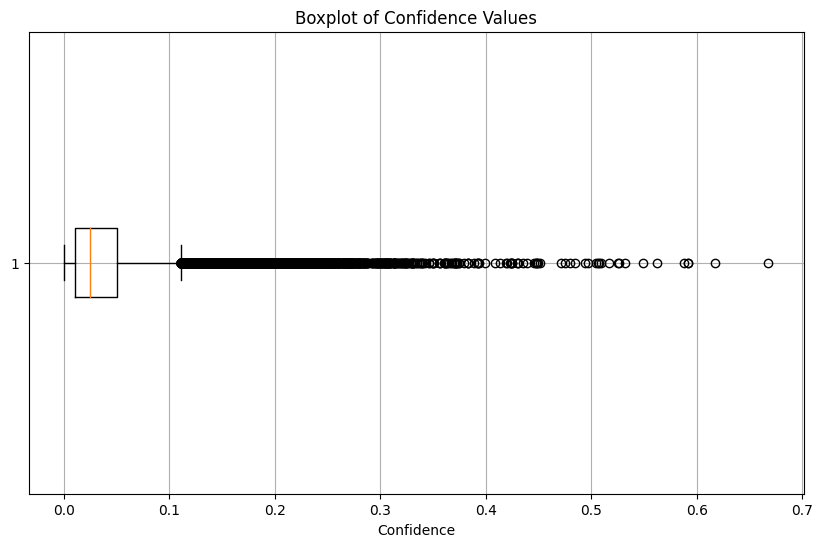

In [ ]:
debug_info_df['conf'].max()

conf_max = debug_info_df['conf'].max()
conf_min = debug_info_df['conf'].min()
conf_mean = debug_info_df['conf'].mean()
conf_std = debug_info_df['conf'].std()

print(f'Max conf: {conf_max}')
print(f'Min conf: {conf_min}')
print(f'Mean conf: {conf_mean}')
print(f'Std dev conf: {conf_std}')
import matplotlib.pyplot as plt

# Plot histogram of 'conf' values
plt.figure(figsize=(10, 6))
plt.hist(debug_info_df['conf'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Confidence Values')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot boxplot of 'conf' values
plt.figure(figsize=(10, 6))
plt.boxplot(debug_info_df['conf'], vert=False)
plt.title('Boxplot of Confidence Values')
plt.xlabel('Confidence')
plt.grid(True)
plt.show()

### A Confiança fica concentrada mais próxima do valor de zero

In [67]:
def plot_multiple_quadratics(debug_info_df, indices):
    """
    Plota várias funções de segundo grau e seus respectivos pontos de dados a partir de um DataFrame.

    Args:
        debug_info_df: DataFrame contendo os dados.
        indices: Lista de índices das linhas do DataFrame a serem plotadas.
    """
    plt.figure(figsize=(10, 6))

    for idx in indices:
        row = debug_info_df.iloc[idx]
        A = row['A']
        B = row['B']
        C = row['C']
        x_list = row['x_list']
        y_list = row['y_list']

        x_values = np.linspace(min(x_list), max(x_list), 400)
        y_values = A * x_values**2 + B * x_values + C

        plt.plot(x_list, y_list, marker='o', linestyle='-', label=f'Data Points {idx}')
        plt.plot(x_values, y_values, linestyle='--', label=f'Quadratic Function {idx}')

    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Plot of Multiple Quadratic Functions and Data Points')
    #plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_multiple_quadratics_2(debug_info_df, indices):
    """
    Plota várias funções de segundo grau e seus respectivos pontos de dados a partir de um DataFrame.

    Args:
        debug_info_df: DataFrame contendo os dados.
        indices: Lista de índices das linhas do DataFrame a serem plotadas.
    """
    plt.figure(figsize=(10, 6))

    for idx in indices:
        row = debug_info_df.iloc[idx]
        #A = row['A']
        #B = row['B']
        #C = row['C']
        x_list = [i for i in range(len(row['focus_values']))]
        print(x_list)
        y_list = row['focus_values']
        print(y_list)

        x_values = np.linspace(min(x_list), max(x_list), 400)
        #y_values = A * x_values**2 + B * x_values + C

        plt.plot(x_list, y_list, marker='o', linestyle='-', label=f'Data Points {idx}')
        #plt.plot(x_values, y_values, linestyle='--', label=f'Quadratic Function {idx}')

    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Plot of Multiple Quadratic Functions and Data Points')
    #plt.legend()
    plt.grid(True)
    plt.show()

In [78]:
def plot_multiple_quadratics_3(debug_info_df, indices):
    """
    Plota várias funções de segundo grau e seus respectivos pontos de dados a partir de um DataFrame.

    Args:
        debug_info_df: DataFrame contendo os dados.
        indices: Lista de índices das linhas do DataFrame a serem plotadas.
    """
    plt.figure(figsize=(10, 6))

    for idx in indices:
        row = debug_info_df.iloc[idx]
        #A = row['A']
        #B = row['B']
        #C = row['C']
        x_list = [i for i in range(len(row['focus_values']))]
        print(x_list)
        y_list = normalize_max(row['focus_values'])
        print(y_list)

        x_values = np.linspace(min(x_list), max(x_list), 400)
        #y_values = A * x_values**2 + B * x_values + C

        plt.plot(x_list, y_list, marker='o', linestyle='-', label=f'Data Points {idx}')
        #plt.plot(x_values, y_values, linestyle='--', label=f'Quadratic Function {idx}')

    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Plot of Multiple Quadratic Functions and Data Points')
    #plt.legend()
    plt.grid(True)
    plt.show()

In [87]:
def plot_multiple_quadratics_4(debug_info_df, indices):
    """
    Plota várias funções de segundo grau e seus respectivos pontos de dados a partir de um DataFrame.

    Args:
        debug_info_df: DataFrame contendo os dados.
        indices: Lista de índices das linhas do DataFrame a serem plotadas.
    """
    plt.figure(figsize=(10, 6))

    for idx in indices:
        row = debug_info_df.iloc[idx]
        #A = row['A']
        #B = row['B']
        #C = row['C']
        x_list = [i for i in range(len(row['focus_values']))]
        print(x_list)
        #y_list = normalize_max(row['focus_values'])
        y_list = [1/f for f in normalize_max(row['focus_values'])]
        print(y_list)

        x_values = np.linspace(min(x_list), max(x_list), 400)
        #y_values = A * x_values**2 + B * x_values + C

        plt.plot(x_list, y_list, marker='o', linestyle='-', label=f'Data Points {idx}')
        #plt.plot(x_values, y_values, linestyle='--', label=f'Quadratic Function {idx}')

    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Plot of Multiple Quadratic Functions and Data Points')
    #plt.legend()
    plt.grid(True)
    plt.show()

In [55]:
lista_indices = []
i = 100
for j in range(2, 320, 20):
    lista_indices.append(debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j)].index.item())

lista_indices

[31483,
 31503,
 31523,
 31543,
 31563,
 31583,
 31603,
 31623,
 31643,
 31663,
 31683,
 31703,
 31723,
 31743,
 31763,
 31783]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.06178745396669673, 0.062108463982423236, 0.042542203007382616, 0.01742565161593967, 0.027959790353744875, 0.13148107841710954, 0.05451513709197388, 0.04781364108841566, 0.05131255976146573, 0.046197019767743826, 0.08636775257453361, 0.010102643503858236]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.17673566817135516, 0.15882202712639187, 0.09306717246540734, 0.05664920429504296, 0.0660573207185669, 0.07185468215828907, 0.03527016901969331, 0.06421586222157628, 0.0391028575418989, 0.05140958466847707, 0.0765424543271839, 0.009152084244480751]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.008305400749814834, 0.0006829689657012076, 0.05043839032295846, 0.014948859807540148, 0.011247189342267316, 0.004311685688843467, 0.042237621310608896, 0.024079541642198346, 0.008223575770637035, 0.055647002068346274, 0.027543862575984526, 0.006206953305651164]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.41009983175598314, 0.3793743270245147, 0.07099832366368727, 0.03125

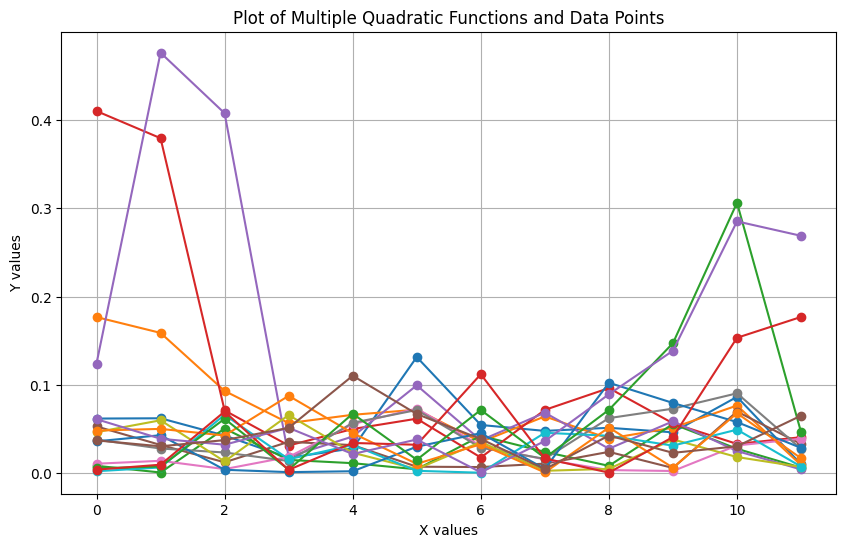

In [56]:
plot_multiple_quadratics_2(debug_info_df,lista_indices)

# Teste 5
focus_indicator = laplacian

imagem_final = imagem_reconstruida **2

In [57]:
debug_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_5/output/depth_from_focus_20241030_1813/debug_data/debug.csv'
debug_info_df = ler_csv_com_listas(debug_path)
debug_info_df.head()

,pixel_i,pixel_j,focus_values,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
0,0,0,"[0.004162330905306945, 0.005993756503642042, 0...","[7, 8, 9, 10, 11]","[0.0026638917793964556, 0.00016649323621227997...","[1, 4, 6, 4, 1]",9.002992,0.008696,0.014600,-0.008696,0.156576,-0.690228
1,0,1,"[0.0010405827263267379, 0.0014984391259105054,...","[3, 4, 5, 6, 7]","[0.0026638917793964695, 0.0014984391259105197,...","[1, 4, 6, 4, 1]",5.028571,0.005827,0.011260,-0.005827,0.058606,-0.136092
2,0,2,"[4.162330905307058e-05, 0.01924037460978146, 0...","[3, 4, 5, 6, 7]","[0.0014984391259105054, 0.00650364203954211, 0...","[1, 4, 6, 4, 1]",4.997295,0.012308,0.025063,-0.012308,0.123017,-0.282313
3,0,3,"[0.05545265348595214, 0.020145681581685733, 2....","[0, 1, 2]","[0.05545265348595214, 0.020145681581685733, 2....","[1, 2, 1]",0.000000,0.000000,0.000000,0.007581,-0.042888,0.055453
4,0,4,"[0.0059937565036420285, 0.022018730489073865, ...","[1, 2, 3, 4, 5]","[0.022018730489073865, 0.010655567117585803, 0...","[1, 4, 6, 4, 1]",2.900455,0.010286,0.027640,-0.010286,0.059669,-0.058894


In [69]:
lista_indices = []
i = 100
for j in range(160, 168, 1):
    lista_indices.append(debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j)].index.item())

lista_indices

[32160, 32161, 32162, 32163, 32164, 32165, 32166, 32167]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0006659729448491199, 0.01133194588969822, 0.0020395421436004255, 0.0005098855359001105, 0.0008428720083246634, 0.00550468262226847, 1.0405827263266466e-05, 0.0006659729448491104, 0.00016649323621227642, 0.0017585848074921746, 0.0037565036420395357, 0.004588969823100963]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.00703433922996879, 0.00016649323621227877, 0.005993756503642042, 0.010000000000000033, 0.00026014568158168376, 0.0059937565036420355, 0.0030072840790842945, 0.003756503642039558, 0.0003746097814776246, 0.0030072840790842793, 9.365244536940969e-05, 4.162330905307294e-05]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0006659729448491127, 0.026014568158168553, 0.0059937565036420355, 0.007034339229968744, 0.008751300728407902, 0.0008428720083246581, 0.019240374609781445, 9.365244536940527e-05, 0.001040582726326735, 0.0303433922996878, 9.365244536940615e-05, 0.009365244536940678]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0033714880332986483, 0.00

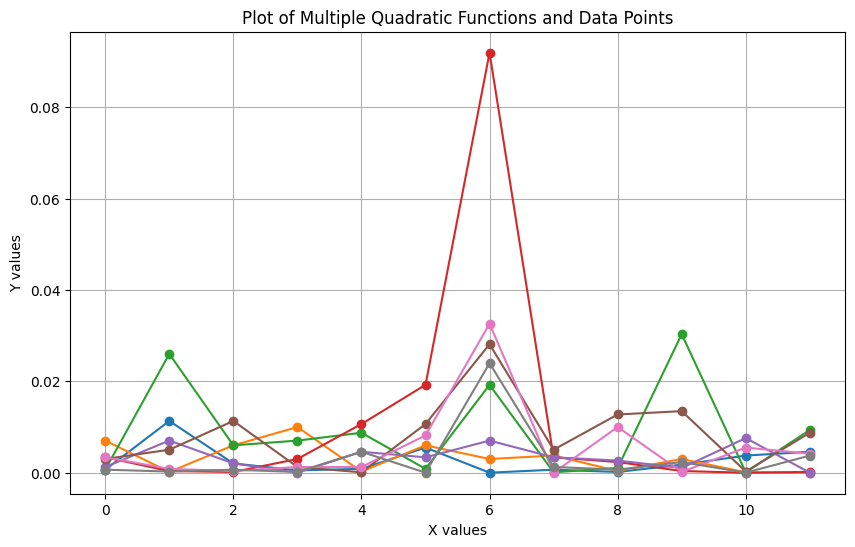

In [70]:
plot_multiple_quadratics_2(debug_info_df,lista_indices)

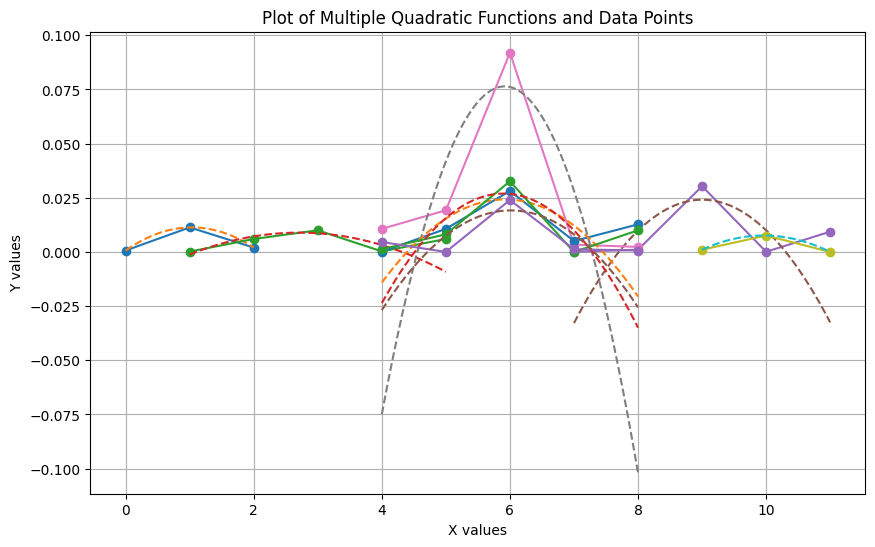

In [71]:
plot_multiple_quadratics(debug_info_df,lista_indices)

# Teste 6
focus_indicator = laplacian

imagem_final = abs(imagem_reconstruida)

In [80]:
debug_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_5/output/depth_from_focus_20241030_1828/debug_data/debug.csv'
debug_info_df = ler_csv_com_listas(debug_path)
debug_info_df.head()

,pixel_i,pixel_j,focus_values,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
0,0,0,"[0.06451612903225787, 0.0774193548387097, 0.04...","[7, 8, 9, 10, 11]","[0.05161290322580639, 0.012903225806451655, 0....","[1, 4, 6, 4, 1]",9.020792,0.054301,0.109486,-0.054301,0.979677,-4.309247
1,0,1,"[0.032258064516128955, 0.038709677419354785, 0...","[3, 4, 5, 6, 7]","[0.05161290322580653, 0.038709677419354965, 0....","[1, 4, 6, 4, 1]",5.033333,0.038710,0.103269,-0.038710,0.389677,-0.877419
2,0,2,"[0.006451612903225873, 0.13870967741935478, 0....","[3, 4, 5, 6, 7]","[0.038709677419354785, 0.08064516129032236, 0....","[1, 4, 6, 4, 1]",4.988119,0.054301,0.156567,-0.054301,0.541720,-1.194516
3,0,3,"[0.23548387096774195, 0.1419354838709677, 4.56...","[0, 1, 2]","[0.23548387096774195, 0.1419354838709677, 4.56...","[1, 2, 1]",-0.500000,0.024194,0.285188,-0.024194,-0.069355,0.235484
4,0,4,"[0.07741935483870961, 0.14838709677419348, 0.1...","[1, 2, 3, 4, 5]","[0.14838709677419348, 0.1032258064516127, 0.18...","[1, 4, 6, 4, 1]",2.834783,0.037097,0.161013,-0.037097,0.210323,-0.137097


In [84]:
lista_indices = []
i = 100
for j in range(164, 168, 1):
    lista_indices.append(debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j)].index.item())

lista_indices

[32164, 32165, 32166, 32167]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.40740741 0.96296296 0.51851852 0.03703704 0.77777778 0.66666667
 0.96296296 0.66666667 0.59259259 0.37037037 1.         0.03703704]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.32692308 0.42307692 0.63461538 0.21153846 0.05769231 0.61538462
 1.         0.42307692 0.67307692 0.69230769 0.09615385 0.55769231]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.32142857 0.16071429 0.10714286 0.19642857 0.19642857 0.5
 1.         0.         0.55357143 0.07142857 0.41071429 0.35714286]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.16666667 0.10416667 0.16666667 0.08333333 0.4375     0.02083333
 1.         0.22916667 0.16666667 0.3125     0.02083333 0.39583333]


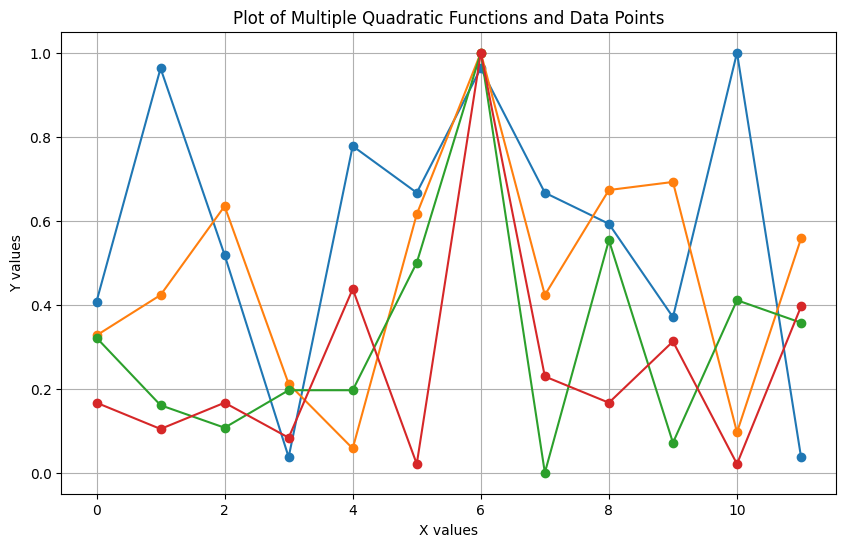

In [85]:
plot_multiple_quadratics_3(debug_info_df,lista_indices)

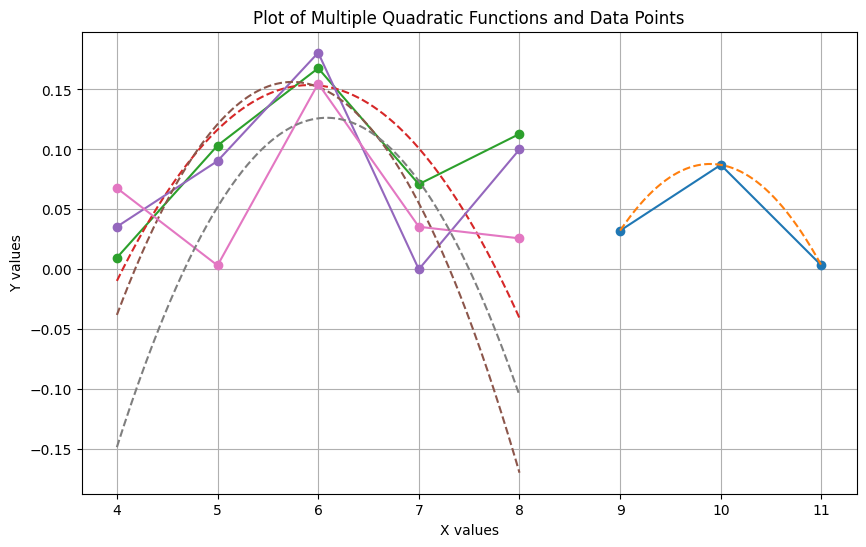

In [86]:
plot_multiple_quadratics(debug_info_df,lista_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[2.454545454545457, 1.0384615384615423, 1.9285714285714337, 26.999999999998984, 1.285714285714285, 1.5000000000000024, 1.03846153846154, 1.5000000000000013, 1.6875000000000007, 2.7000000000000015, 1.0, 26.999999999999364]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[3.0588235294117685, 2.3636363636363678, 1.5757575757575766, 4.727272727272738, 17.333333333333396, 1.6249999999999993, 1.0, 2.363636363636364, 1.4857142857142855, 1.4444444444444449, 10.400000000000068, 1.793103448275863]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[3.111111111111112, 6.222222222222244, 9.333333333333343, 5.090909090909089, 5.090909090909082, 2.000000000000001, 1.0, inf, 1.806451612903227, 13.99999999999985, 2.4347826086956545, 2.800000000000002]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[5.9999999999999964, 9.599999999999975, 6.000000000000007, 12.000000000000037, 2.2857142857142816, 48.00000000000015, 1.0, 4.3636363636363535, 5.999999999999987, 3.199999999999988, 48.0000000000001

/tmp/ipykernel_4538/1964640028.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  y_list = [1/f for f in normalize_max(row['focus_values'])]


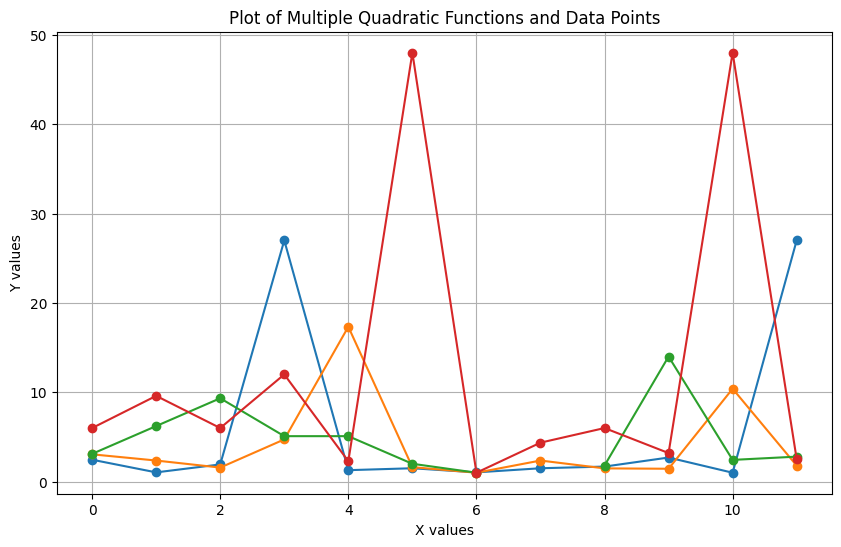

In [88]:
plot_multiple_quadratics_4(debug_info_df,lista_indices)

# Teste 7
focus indicator: Fourier

In [4]:
debug_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_5/output/depth_from_focus_20241101_1252/debug_data/debug.csv'
debug_info_df = ler_csv_com_listas(debug_path)
debug_info_df.head()

,pixel_i,pixel_j,focus_values,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
0,1,1,"[0.02785648716237357, 0.00847034901884241, 0.0...","[7, 8, 9, 10, 11]","[0.006108061423638424, 0.054733478894591604, 0...","[0.025285242051114296, 0.2265774958963853, 0.3...",9.161576,0.024845,0.090697,-0.024845,0.455232,-1.994623
1,1,2,"[0.1899850511785332, 0.15576384778599242, 0.03...","[0, 1, 2]","[0.1899850511785332, 0.15576384778599242, 0.03...","[0.5035916959345923, 0.4128818545735606, 0.083...",0.119897,0.045016,0.190632,-0.045016,0.010795,0.189985
2,1,3,"[0.3074269995640989, 0.2881147876384312, 0.044...","[0, 1, 2]","[0.3074269995640989, 0.2881147876384312, 0.044...","[0.4804142831796211, 0.4502352082706584, 0.069...",0.413948,0.112212,0.326655,-0.112212,0.092900,0.307427
3,1,4,"[0.17927654788060293, 0.18170242695429356, 0.1...","[0, 1, 2]","[0.17927654788060293, 0.18170242695429356, 0.1...","[0.3857713378079841, 0.3909913993647321, 0.223...",0.530178,0.040192,0.190574,-0.040192,0.042618,0.179277
4,1,5,"[0.0315591894068891, 0.027383784582622448, 0.1...","[5, 6, 7, 8, 9]","[0.07223903481977396, 0.06933432006164217, 0.0...","[0.21890780628730905, 0.21010557440285219, 0.0...",7.249762,0.008959,0.106066,-0.008959,0.129894,-0.364785


OLD - A: -0.0182637459099819, B: 0.2000984029629934, C: -0.4450319551617586, min:5.478021977233905, k_fuzzy:5.478021977233905, conf:0.0182637459099819
A: -0.018263745909981904, B: 0.20009840296299344, C: -0.4450319551617586, min:5.478021977233905


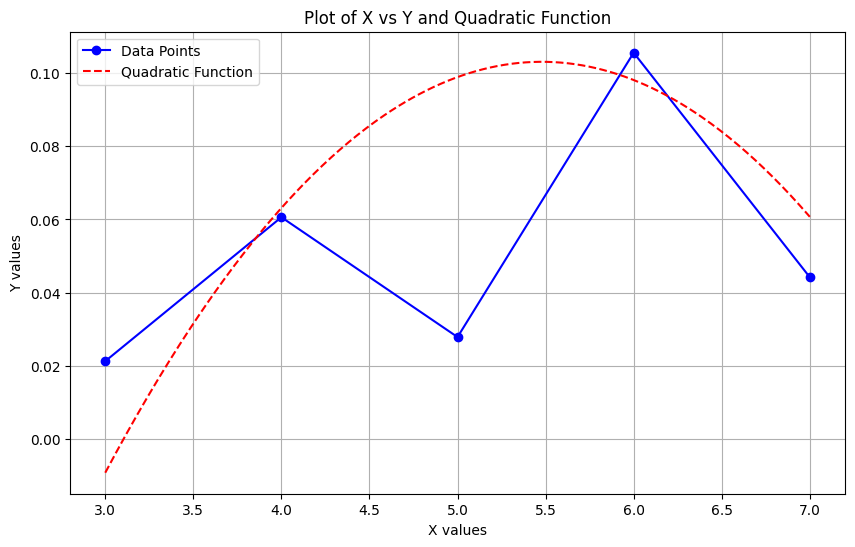

In [12]:

i = 92
j = 172

x_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'x_list'].item()
y_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'y_list'].item()
w_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'w_list'].item()
A = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'A'].item()
B = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'B'].item()
C = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'C'].item()
k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
conf = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'conf'].item()
focus_values = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'focus_values'].item()

print(f'OLD - A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}, k_fuzzy:{k_fuzzy}, conf:{conf}')


A, B, C = tuple(np.polyfit(x_list, y_list, 2, w=w_list)) #coeficientes da funcao de segundo grau
print(f'A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}')
plot_quadratic_and_xy(A, B, C, x_list, y_list)

In [5]:
debug_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_5/output/depth_from_focus_20241101_1507/debug_data/debug.csv'
debug_info_df = ler_csv_com_listas(debug_path)
debug_info_df.head()

,pixel_i,pixel_j,focus_values,x_list,y_list,w_list,k_fuzzy,conf,fnoc,A,B,C
0,1,1,"[0.02785648716237357, 0.00847034901884241, 0.0...","[7, 8, 9, 10, 11]","[0.006108061423638424, 0.054733478894591604, 0...","[0.025285242051114296, 0.2265774958963853, 0.3...",9.161576,0.024845,0.090697,-0.024845,0.455232,-1.994623
1,1,2,"[0.1899850511785332, 0.15576384778599242, 0.03...","[0, 1, 2]","[0.1899850511785332, 0.15576384778599242, 0.03...","[0.5035916959345923, 0.4128818545735606, 0.083...",0.119897,0.045016,0.190632,-0.045016,0.010795,0.189985
2,1,3,"[0.3074269995640989, 0.2881147876384312, 0.044...","[0, 1, 2]","[0.3074269995640989, 0.2881147876384312, 0.044...","[0.4804142831796211, 0.4502352082706584, 0.069...",0.413948,0.112212,0.326655,-0.112212,0.092900,0.307427
3,1,4,"[0.17927654788060293, 0.18170242695429356, 0.1...","[0, 1, 2]","[0.17927654788060293, 0.18170242695429356, 0.1...","[0.3857713378079841, 0.3909913993647321, 0.223...",0.530178,0.040192,0.190574,-0.040192,0.042618,0.179277
4,1,5,"[0.0315591894068891, 0.027383784582622448, 0.1...","[6, 7, 8, 9, 10]","[0.06933432006164217, 0.019475747158920188, 0....","[0.24681286393035165, 0.06932879603063712, 0.4...",7.530581,0.018932,0.112359,-0.018932,0.285132,-0.961247


In [6]:
def plot_quadratic_and_xy_2(A, B, C, x_list, y_list, focus_values):
    """
    Plota a função de segundo grau A*x^2 + B*x + C junto com os valores de x_list e y_list.

    Args:
        A: Coeficiente A da função de segundo grau.
        B: Coeficiente B da função de segundo grau.
        C: Coeficiente C da função de segundo grau.
        x_list: Lista de valores no eixo x.
        y_list: Lista de valores no eixo y.
        focus_values: Lista de valores de foco.
    """
    x_values = np.linspace(min(x_list), max(x_list), 400)
    y_values = A * x_values**2 + B * x_values + C

    plt.figure(figsize=(10, 6))
    plt.plot([i for i in range(len(focus_values))], focus_values, marker='o', linestyle='-', color='g', label='Focus Values')
    plt.plot(x_list, y_list, marker='o', linestyle='-', color='b', label='Data Points')
    plt.plot(x_values, y_values, linestyle='--', color='r', label='Quadratic Function')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Plot of X vs Y and Quadratic Function')
    plt.legend()
    plt.grid(True)
    plt.show()

OLD - A: -0.0191011623665825, B: 0.2124811385901557, C: -0.487894689059486, min:5.561994985234293, k_fuzzy:5.561994985234288, conf:0.0191011623665825
A: -0.019101162366582516, B: 0.21248113859015572, C: -0.487894689059486, min:5.561994985234288


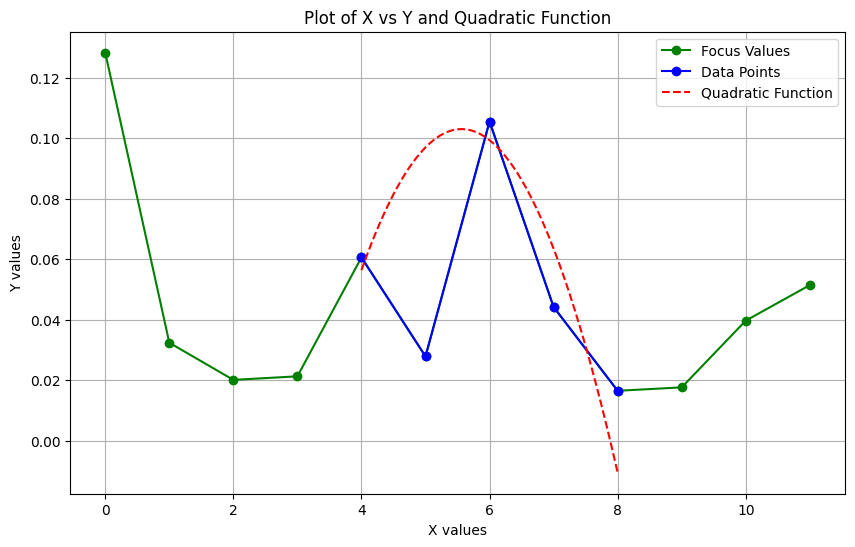

In [7]:

i = 92
j = 172

x_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'x_list'].item()
y_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'y_list'].item()
w_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'w_list'].item()
A = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'A'].item()
B = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'B'].item()
C = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'C'].item()
k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
conf = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'conf'].item()
focus_values = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'focus_values'].item()

print(f'OLD - A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}, k_fuzzy:{k_fuzzy}, conf:{conf}')


A, B, C = tuple(np.polyfit(x_list, y_list, 2, w=w_list)) #coeficientes da funcao de segundo grau
print(f'A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}')
plot_quadratic_and_xy_2(A, B, C, x_list, y_list, focus_values)  

OLD - A: -0.0524079509108398, B: 0.70917648471707, C: -2.138237017185164, min:6.765924562892874, k_fuzzy:6.765924562892874, conf:0.0524079509108398
A: -0.0524079509108398, B: 0.70917648471707, C: -2.1382370171851637, min:6.765924562892874


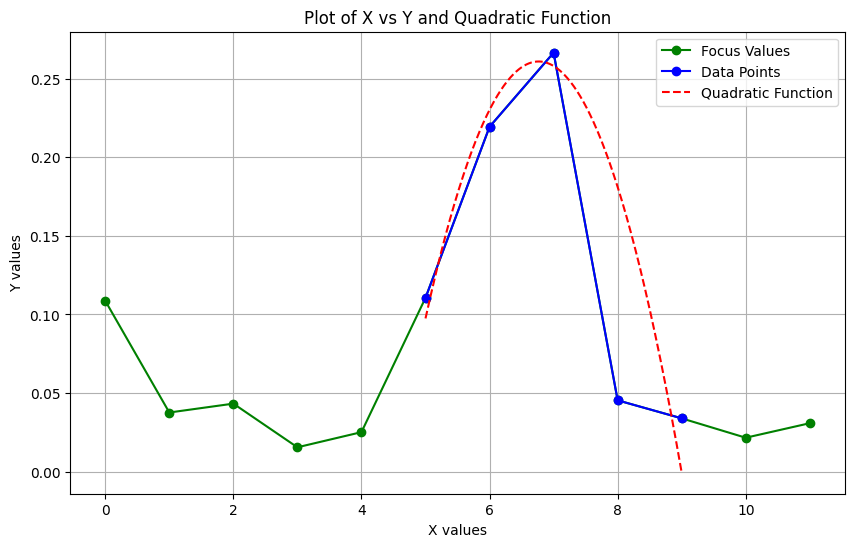

In [9]:

i = 92
j = 180

x_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'x_list'].item()
y_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'y_list'].item()
w_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'w_list'].item()
A = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'A'].item()
B = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'B'].item()
C = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'C'].item()
k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
conf = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'conf'].item()
focus_values = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'focus_values'].item()

print(f'OLD - A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}, k_fuzzy:{k_fuzzy}, conf:{conf}')


A, B, C = tuple(np.polyfit(x_list, y_list, 2, w=w_list)) #coeficientes da funcao de segundo grau
print(f'A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}')
plot_quadratic_and_xy_2(A, B, C, x_list, y_list, focus_values)  

OLD - A: 0.0078675616209177, B: -0.1319492074958863, C: 0.5737867142805158, min:8.385648174973893, k_fuzzy:11.0, conf:0.0
A: 0.007867561620917727, B: -0.13194920749588632, C: 0.5737867142805158, min:8.385648174973864


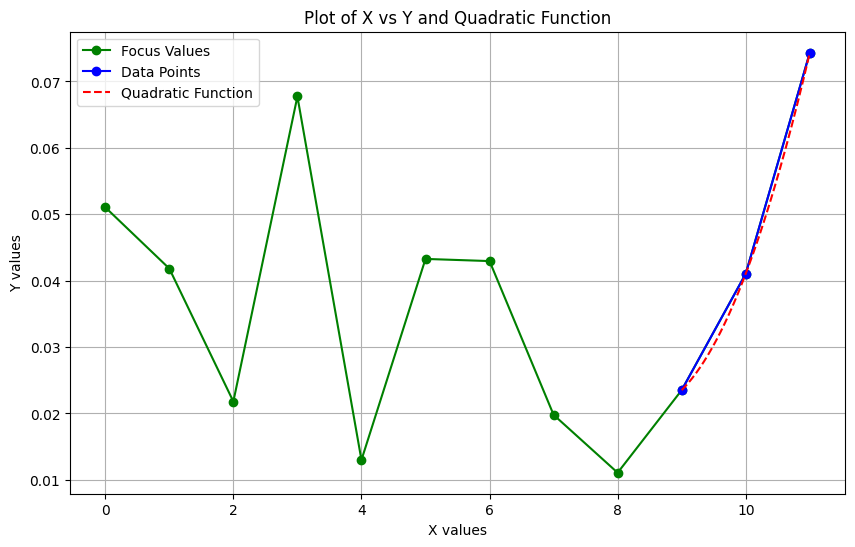

In [13]:

i = 112
j = 126

x_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'x_list'].item()
y_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'y_list'].item()
w_list = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'w_list'].item()
A = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'A'].item()
B = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'B'].item()
C = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'C'].item()
k_fuzzy = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'k_fuzzy'].item()
conf = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'conf'].item()
focus_values = debug_info_df.loc[(debug_info_df['pixel_i'] == i) & (debug_info_df['pixel_j'] == j), 'focus_values'].item()

print(f'OLD - A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}, k_fuzzy:{k_fuzzy}, conf:{conf}')


A, B, C = tuple(np.polyfit(x_list, y_list, 2, w=w_list)) #coeficientes da funcao de segundo grau
print(f'A: {A}, B: {B}, C: {C}, min:{-B/(2*A)}')
plot_quadratic_and_xy_2(A, B, C, x_list, y_list, focus_values)  

<Axes: title={'center': 'k_fuzzy vs pixel_j'}, xlabel='pixel_j', ylabel='k_fuzzy'>

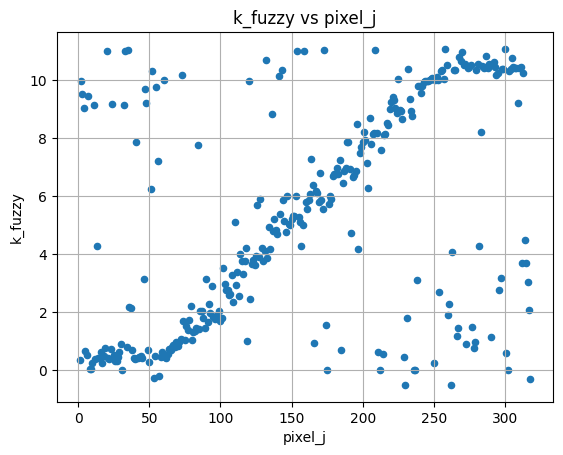

In [8]:
debug_info_df[debug_info_df['pixel_i'] == 92][['k_fuzzy','pixel_j']].plot(x='pixel_j', y='k_fuzzy', kind='scatter', title='k_fuzzy vs pixel_j', grid=True)